# Analise - População de Rua

### Importações

In [6]:
#Pandas para manipulação de dataframe:
import pandas as pd

In [7]:
#Bibliotecas para plotagem de gráficos:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sn

In [8]:
#Folium pra fazer peripécia no gráfico ;)
import folium

### Manipulação da Tabela

Importação de dados

In [9]:
#importando os dados de população de Rua:
df_poprua = pd.read_excel(r'D:\Estudo\Extensão - Ciência de Dados\Base do Censo PopRua 2020 (anonimizada).xlsx')

#importando os dados do município do Rio:
muni_rj = gpd.read_file(r'D:\Estudo\Extensão - Ciência de Dados\Munipios\muni_rj.json', driver="GeoJSON")

C:\Users\amori\anaconda3\envs\datamind\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Dados de população de Rua

In [10]:
#Tabela:
display(df_poprua)

,Chave_única,ID,Rua_Acolhimento,Local da coleta de dados,Unidade de Acolhimento/US,Método,Instrumento de coleta,Cod_setor,Turno,Data,...,Motivo_local_uso_droga,Necessidade_sair_situação,Área de Planejamento,Nome do Bairro,Código da RP,RP,Código da RA,Região Administrativa,Faixa etária,Classificação idade
0,Rua_10000,Rua_2,Rua,Rua,NaN,Entrevista,Questionário normal,D1S21M,Manhã,26/10/2020,...,Não se aplica,Não quero sair da rua,AP 5,Paciência,5.3,5.3 - Santa Cruz,19,XIX - SANTA CRUZ,18 a 30,Adulto
1,Rua_10001,Rua_5,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Família,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto
2,Rua_10002,Rua_6,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Moradia,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto
3,Rua_10003,Rua_8,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Não quero sair da rua,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,50 a 59,Adulto
4,Rua_10004,Rua_9,Rua,Rua,NaN,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não se aplica,Outro,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,Unidade de acolhimento_17267,Comunidades Terapêuticas_262,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,NaN,...,Não se aplica,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação
7268,Unidade de acolhimento_17268,Comunidades Terapêuticas_263,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,NaN,...,Não se aplica,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação
7269,Unidade de acolhimento_17269,Comunidades Terapêuticas_264,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,NaN,...,Não se aplica,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação
7270,Unidade de acolhimento_17270,Comunidades Terapêuticas_265,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,NaN,...,Não se aplica,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação


In [11]:
#Puxar as colunas aqui, pra ter uma vizualização melhor dos elementos estudados:
print(df_poprua.info('columns'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7272 entries, 0 to 7271
Data columns (total 136 columns):
 #    Column                                                                                               Dtype  
---   ------                                                                                               -----  
 0    Chave_única                                                                                          object 
 1    ID                                                                                                   object 
 2    Rua_Acolhimento                                                                                      object 
 3    Local da coleta de dados                                                                             object 
 4    Unidade de Acolhimento/US                                                                            object 
 5    Método                                                                           

### Correções

In [12]:
#Valores nulos:
Q_Nan = df_poprua.isnull().sum().sum()
print("A quantidade de NaN é {}".format(Q_Nan))
if Q_Nan == 0:
    print("Normalizado")
else:
    print("Ainda há NaN na tabela!")

A quantidade de NaN é 12726
Ainda há NaN na tabela!


In [13]:
#Definindo as tabelas que tem dados Nulos:
enulo=df_poprua.isnull().sum()
display(enulo.head(50))

#Corrigindo:
df_poprua['Unidade de Acolhimento/US'].fillna('Sem Resposta', inplace = True)
df_poprua['Data'].fillna('Sem Resposta', inplace = True)
df_poprua['Abrigos_apresentam_problemas'].fillna('Sem Resposta', inplace = True)
df_poprua['Onde_estava_antes_Unidade_acolhimento'].fillna('Sem Resposta', inplace = True)

#Checando os dados tratados:
Q_Nan_2 = df_poprua.isnull().sum().sum()
print("A quantidade de NaN é {}".format(Q_Nan_2))
if Q_Nan_2 == 0:
    print("Normalizado")
else:
    print("Ainda há NaN na tabela!")

Chave_única                                                                                               0
ID                                                                                                        0
Rua_Acolhimento                                                                                           0
Local da coleta de dados                                                                                  0
Unidade de Acolhimento/US                                                                              5435
Método                                                                                                    0
Instrumento de coleta                                                                                     0
Cod_setor                                                                                                 0
Turno                                                                                                     0
Data                        

A quantidade de NaN é 0
Normalizado


### Contagens

In [14]:
#Tabela em porcentagem
df_poprua['Município'].value_counts(dropna = False, sort = True, ascending = False, normalize = True).head(50) *100

Não se aplica                  91.350385
Duque de Caxias                 1.787679
NS/NR                           1.333883
Nova Iguaçu                     0.907591
Niterói                         0.563806
São João de Meriti              0.412541
Belford Roxo                    0.398790
Nilópolis                       0.288779
Campos dos Goytacazes           0.288779
Petrópolis                      0.233773
São Gonçalo                     0.233773
Queimados                       0.178768
Nova Friburgo                   0.151265
Mesquita                        0.137514
Magé                            0.137514
Itaguaí                         0.110011
Macaé                           0.110011
Angra dos Reis                  0.096260
Cabo Frio                       0.096260
Volta Redonda                   0.096260
Três Rios                       0.082508
Araruama                        0.068757
Barra Mansa                     0.068757
Resende                         0.068757
Japeri          

### Graficos e Plotagens

Plotagens simple com o Pandas

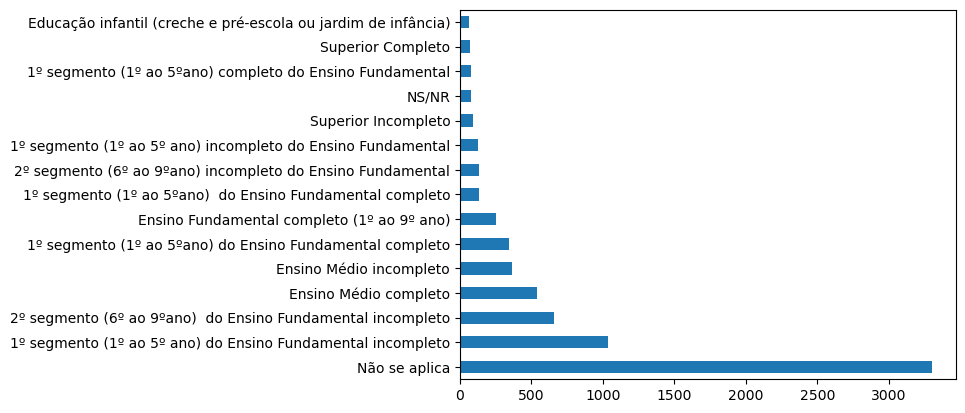

In [15]:
#Gráfico de barras horizontais:
plt.show(df_poprua['Escolaridade'].value_counts().plot(kind = 'barh'))

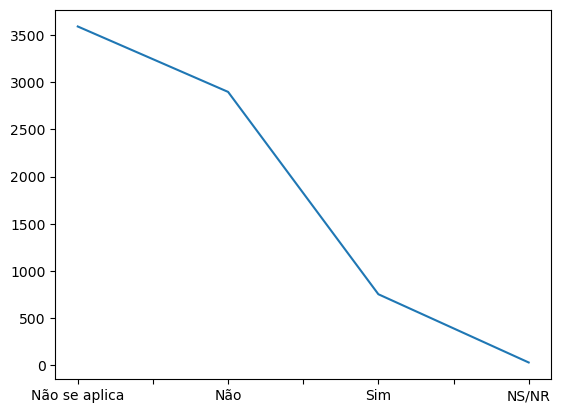

In [16]:
#Gráfico de linha:
plt.show(df_poprua['Rua_início_coronavírus'].value_counts().plot(kind = 'line'))

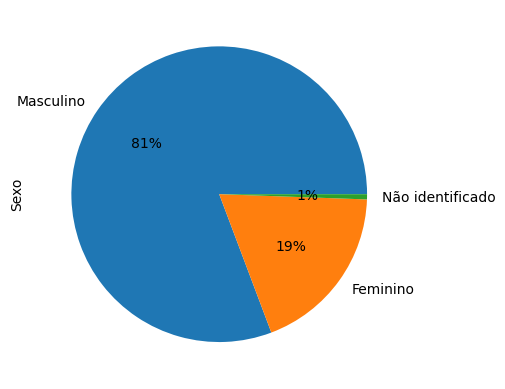

In [17]:
#Gráfico de setores:
plt.show(df_poprua['Sexo'].value_counts().plot(kind = 'pie', autopct = '%.f%%'))

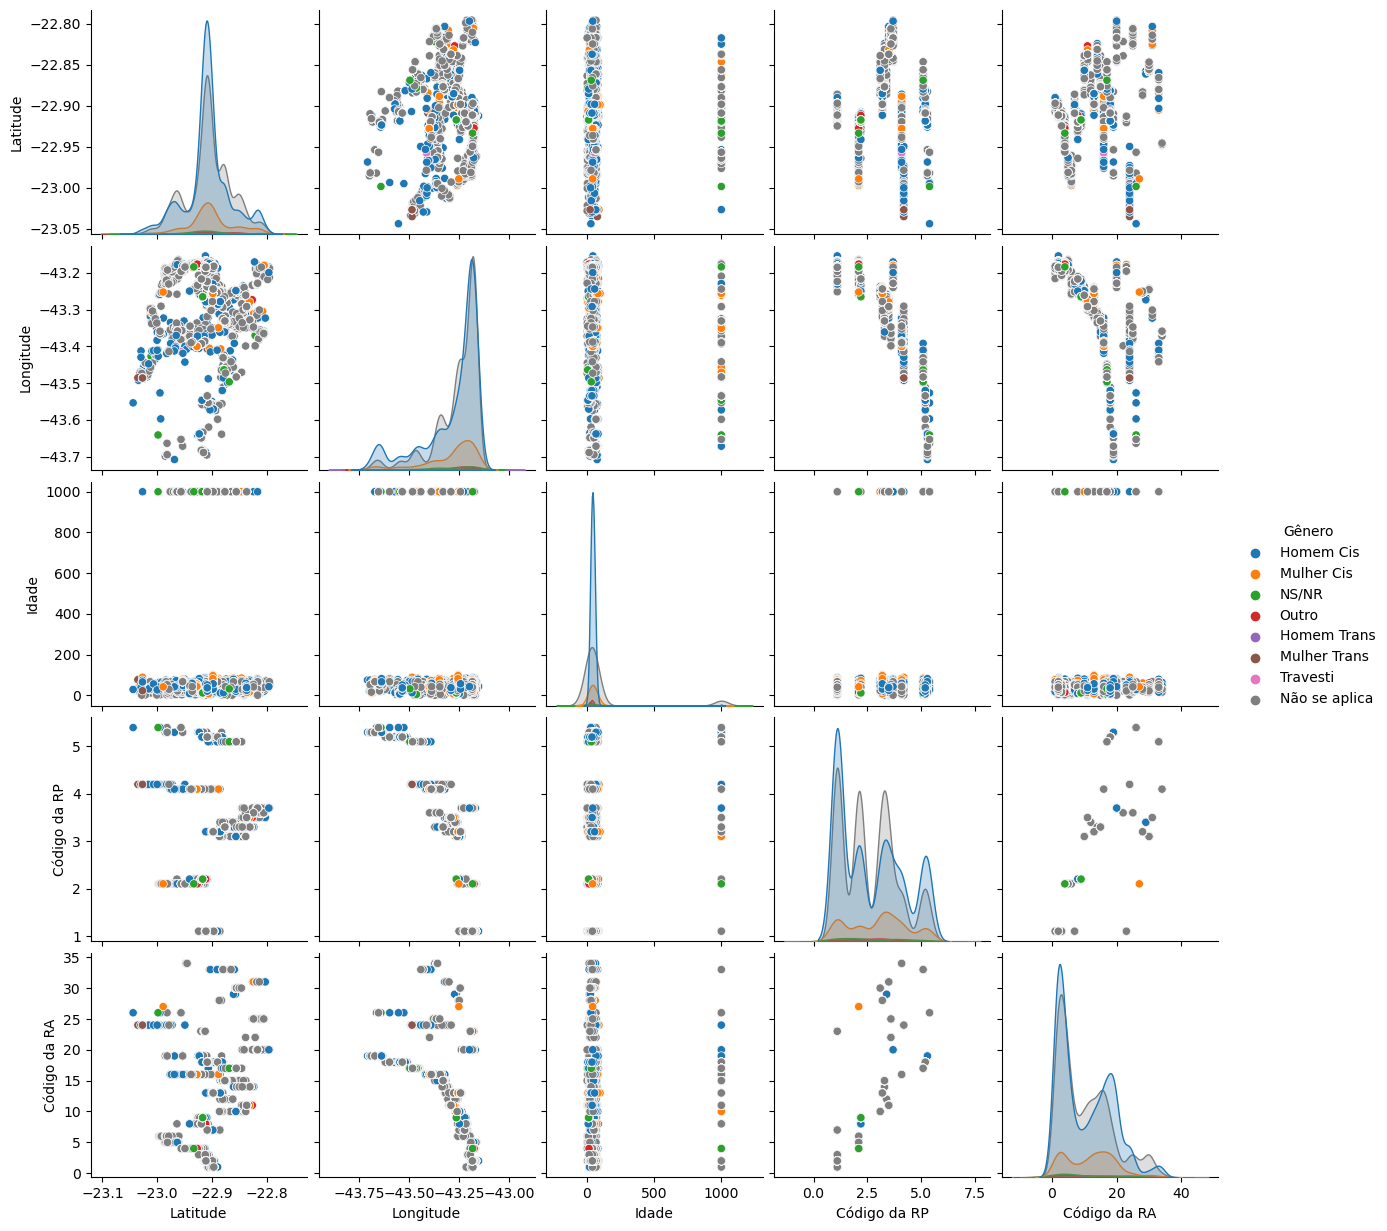

In [18]:
#pairplot
plt.show(sn.pairplot(df_poprua, hue="Gênero"))

### Mapas Georeferenciados

Preparando o datafrema para montar o gráfico

In [19]:
from shapely.geometry import Point, LineString, Polygon

Primeiro vamos preparar a tabela para ela poder funcionar dentro do geodataframe

In [20]:
df_poprua[['Longitude','Latitude']]

,Longitude,Latitude
0,-43.634687,-22.917108
1,-43.558147,-22.901543
2,-43.558115,-22.901599
3,-43.555531,-22.904111
4,-43.563940,-22.907769
...,...,...
7267,-43.653160,-22.956898
7268,-43.653160,-22.956898
7269,-43.653160,-22.956898
7270,-43.653160,-22.956898


In [21]:
#Criando a tabela geometry
df_poprua['geometry'] = None

'''
Para o funcionamento correto do dataframe como um geodataframe, pela forma que o geopandas funciona,
é necessário criar uma tabela que tenha nela as coordenadas, Latitude e Longitude, como Point, para que,
desta forma, consiga-se 
'''

#Para cada linha dessa coluna geometry, serão acrescentadas as coordenadas Latitude e Longitude no formato Point
for index,row in df_poprua.iterrows():
    df_poprua.loc[index, 'geometry'] = Point(row.Longitude,row.Latitude)
    
display(df_poprua)

C:\Users\amori\anaconda3\envs\datamind\lib\site-packages\pandas\core\internals\managers.py:304: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  applied = getattr(b, f)(**kwargs)


,Chave_única,ID,Rua_Acolhimento,Local da coleta de dados,Unidade de Acolhimento/US,Método,Instrumento de coleta,Cod_setor,Turno,Data,...,Necessidade_sair_situação,Área de Planejamento,Nome do Bairro,Código da RP,RP,Código da RA,Região Administrativa,Faixa etária,Classificação idade,geometry
0,Rua_10000,Rua_2,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S21M,Manhã,26/10/2020,...,Não quero sair da rua,AP 5,Paciência,5.3,5.3 - Santa Cruz,19,XIX - SANTA CRUZ,18 a 30,Adulto,POINT (-43.63468747867677 -22.91710790310234)
1,Rua_10001,Rua_5,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Família,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto,POINT (-43.5581468 -22.9015435)
2,Rua_10002,Rua_6,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Moradia,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto,POINT (-43.5581147 -22.9015987)
3,Rua_10003,Rua_8,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não quero sair da rua,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,50 a 59,Adulto,POINT (-43.5555309 -22.9041105)
4,Rua_10004,Rua_9,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Outro,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto,POINT (-43.5639398 -22.907769)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,Unidade de acolhimento_17267,Comunidades Terapêuticas_262,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,Sem Resposta,...,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação,POINT (-43.6531595624735 -22.9568976650272)
7268,Unidade de acolhimento_17268,Comunidades Terapêuticas_263,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,Sem Resposta,...,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação,POINT (-43.6531595624735 -22.9568976650272)
7269,Unidade de acolhimento_17269,Comunidades Terapêuticas_264,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,Sem Resposta,...,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação,POINT (-43.6531595624735 -22.9568976650272)
7270,Unidade de acolhimento_17270,Comunidades Terapêuticas_265,Acolhidos,Comunidades terapêuticas,Instituto Revivendo com Cristo,Observação,Questionário normal,Não se aplica,Não se aplica,Sem Resposta,...,Não se aplica,AP 5,Guaratiba,5.4,5.4 - Guaratiba,26,XXVI - GUARATIBA,Não identificada,Sem informação,POINT (-43.6531595624735 -22.9568976650272)


In [22]:
#Criando o Geodataframe
geo_poprua = gpd.GeoDataFrame(df_poprua, geometry = 'geometry')
print(type(geo_poprua))#agoa sim nos temos um geodataframe
display(geo_poprua.head(5))#Mas note que a tabela continua normal... Legal né.
print(geo_poprua.info())

<class 'geopandas.geodataframe.GeoDataFrame'>


,Chave_única,ID,Rua_Acolhimento,Local da coleta de dados,Unidade de Acolhimento/US,Método,Instrumento de coleta,Cod_setor,Turno,Data,...,Necessidade_sair_situação,Área de Planejamento,Nome do Bairro,Código da RP,RP,Código da RA,Região Administrativa,Faixa etária,Classificação idade,geometry
0,Rua_10000,Rua_2,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S21M,Manhã,26/10/2020,...,Não quero sair da rua,AP 5,Paciência,5.3,5.3 - Santa Cruz,19,XIX - SANTA CRUZ,18 a 30,Adulto,POINT (-43.63469 -22.91711)
1,Rua_10001,Rua_5,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Família,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto,POINT (-43.55815 -22.90154)
2,Rua_10002,Rua_6,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Moradia,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto,POINT (-43.55811 -22.90160)
3,Rua_10003,Rua_8,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Não quero sair da rua,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,50 a 59,Adulto,POINT (-43.55553 -22.90411)
4,Rua_10004,Rua_9,Rua,Rua,Sem Resposta,Entrevista,Questionário normal,D1S20M,Manhã,26/10/2020,...,Outro,AP 5,Campo Grande,5.2,5.2 - Campo Grande,18,XVIII - CAMPO GRANDE,31 a 49,Adulto,POINT (-43.56394 -22.90777)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7272 entries, 0 to 7271
Columns: 137 entries, Chave_única to geometry
dtypes: float64(3), geometry(1), int64(2), object(131)
memory usage: 7.6+ MB
None


Preparando a geometria para o gráfico

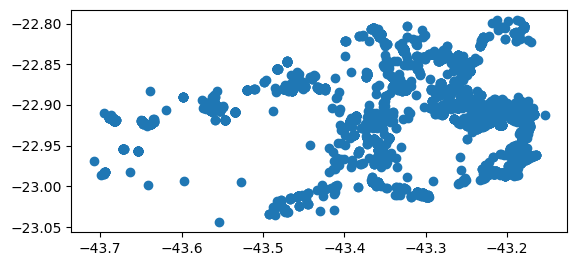

In [23]:
plt.show(geo_poprua.plot())

In [24]:
muni_rj.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   CD_MUN    1 non-null      object  
 1   NM_MUN    1 non-null      object  
 2   SIGLA     1 non-null      object  
 3   AREA_KM2  1 non-null      float64 
 4   geometry  1 non-null      geometry
dtypes: float64(1), geometry(1), object(3)
memory usage: 168.0+ bytes


Dados da região (Mapa) do Rio de Janeiro (Estado)

Unindo o (agora) GeoDataFrame à geometria

,CD_MUN,NM_MUN,SIGLA,AREA_KM2,geometry
0,3304557,Rio de Janeiro,RJ,1200.329,"MULTIPOLYGON (((-43.56883 -23.08162, -43.56886..."


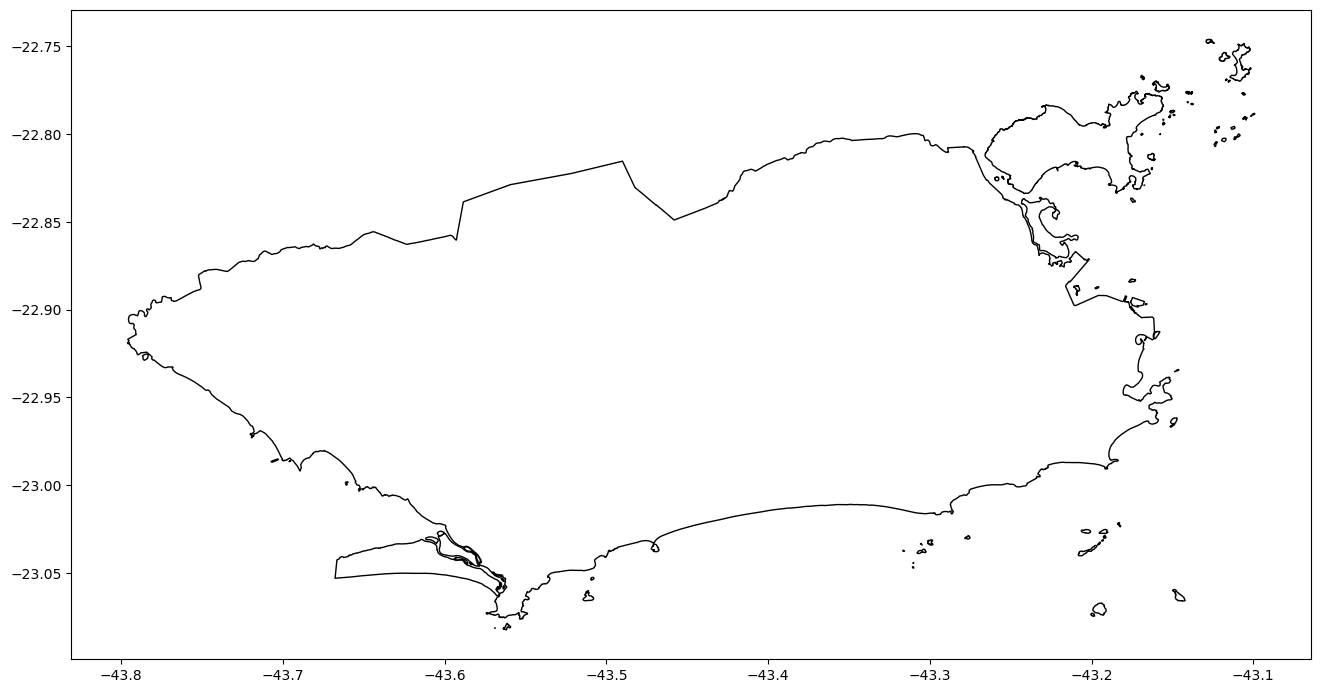

In [25]:
#Mapa do Município:
display(muni_rj.head(5))
plt.show((muni_rj.plot(figsize = (16, 14),facecolor = 'white', edgecolor = 'black')))

Corrigindo possiveis problemas da junção

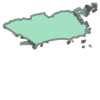

shapely.geometry.multipolygon.MultiPolygon

In [26]:
#Transformando o mapa em poligono
poly_rio = muni_rj.iloc[0].geometry
display(poly_rio)
type(poly_rio)

In [27]:
geo_poprua2 = geo_poprua[geo_poprua.intersects(poly_rio)]

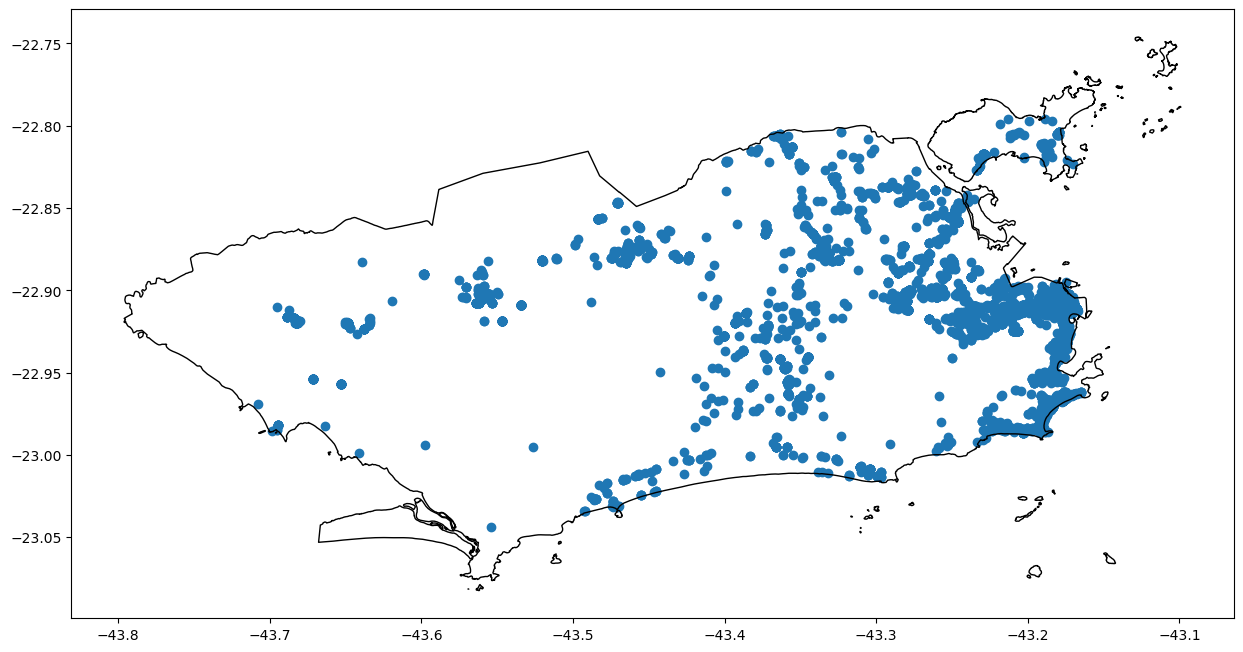

In [28]:
fig, ax = plt.subplots(figsize = (15,15))
plt.show(geo_poprua2.plot(ax=ax),muni_rj.plot(ax=ax, facecolor = "None", edgecolor = "black"))